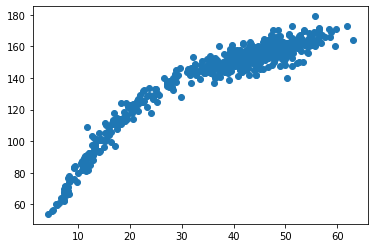

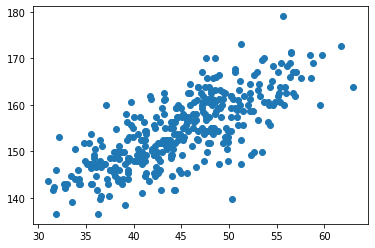

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Howell1 = pd.read_csv("https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv", sep=";")
d = Howell1
d2 = d[d.age >= 18]


plt.scatter(d.weight.values, d.height.values)
plt.show()
plt.scatter(d2.weight.values, d2.height.values)
plt.show()

(352,)
(352, 1)


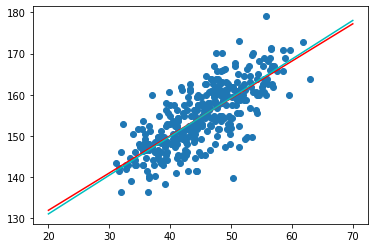

In [93]:
# MLE

y2 = np.array(d2.height.values)
X2 = d2.weight.values.reshape(-1,1)
X2_bias = np.concatenate((np.ones(X2.shape[0]).reshape(-1,1), X2), axis=1)
print(d2.weight.values.shape)
print(X2.shape)
w_mle = (np.dot(np.dot(np.linalg.inv(np.dot(X2_bias.T,X2_bias)), X2_bias.T), y2)).reshape(-1, 1)
X_grid = np.linspace(20, 70, 50).reshape(-1,1)

X_star = np.concatenate((np.ones(50).reshape(-1,1), X_grid), axis=1)
y2_pred_mle = np.dot(X_star, w_mle)

plt.scatter(d2.weight.values, d2.height.values)
plt.plot(X_grid, y2_pred_mle, "-r")
plt.show()

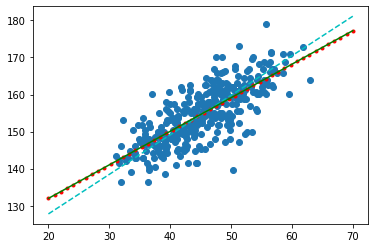

In [102]:
mu_y2 = np.sum(y2)/y2.shape[0]
mu_X2 = np.sum(X2)/X2.shape[0]
X2_norm = X2-mu_X2

# minimum eigenvalue of data should be the perpendicular variance of the data
data_matrix = np.concatenate((X2, y2.reshape(-1,1)), axis=1)
U, S, Vh = np.linalg.svd(data_matrix)
eig = np.square(S.reshape(-1,1)/(data_matrix.shape[0]-1))
var_prior = (np.amin(eig))
var_likelihood = var_prior

# mu for theta is the assumed mean of the slope
w_mu_prior = 0
w_var_prior = 0.1

# MAP [Murphy at al]
y_var_prior = var_likelihood
w_var_post = y_var_prior * np.linalg.inv(y_var_prior + np.dot(X2_norm.T, X2_norm))
w_mu_post =   w_var_post * (w_var_prior**-1) * w_mu_prior \
            + w_var_post * (y_var_prior**-1) * np.dot(X2_norm.T, y2-mu_y2 )


y2_pred_map = np.dot(X_grid - mu_X2, w_mu_post) + mu_y2

lamda = 0.5
w_ridge = (np.dot(np.dot(np.linalg.inv(np.dot(X2_bias.T,X2_bias) + lamda), X2_bias.T), y2)).reshape(-1, 1)
y2_pred_ridge = np.dot(X_star, w_ridge)

plt.scatter(d2.weight.values, d2.height.values)
plt.plot(X_grid, y2_pred_mle, ".r")
plt.plot(X_grid, y2_pred_ridge, "--c")
plt.plot(X_grid, y2_pred_map, "g")
plt.show()

